In [ ]:
#inf2178 assignment 2 (Winter2024)
#Michelle Lee (student no 1001448169)

#impoRT packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

#load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/INF2178_A2_data.xlsx')

#print first few rows to see content in dataset
print(df.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 574.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=336a4609117db8d5bcb9f86dbc95ad0d3f7be9098e24da598ca68e1423465816
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit
Mounted at /content/drive
   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1

In [ ]:
#MELT the data - make it long form dataframe instead of wide form dataframe
#use pd.melt func to make it into a dataframe
df_melt = pd.melt(df, id_vars=['_id', 'LOC_ID', 'LOC_NAME', 'AUSPICE', 'ADDRESS', 'PCODE', 'ward', 'bldg_type', 'BLDGNAME', 'subsidy', 'cwelcc_flag'],
                  value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'],
                  var_name='AgeGroup', value_name='Capacity')
print(df_melt.head())

   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME subsidy  \
0    Public Elementary School     Seventh Street Public School       Y   
1    Public Elementary School  North Preparatory Public School       Y   
2  Catholic El

In [ ]:
#filter for TGSPACE only
df_filtered = df_melt[df_melt['AgeGroup'] == 'TGSPACE']

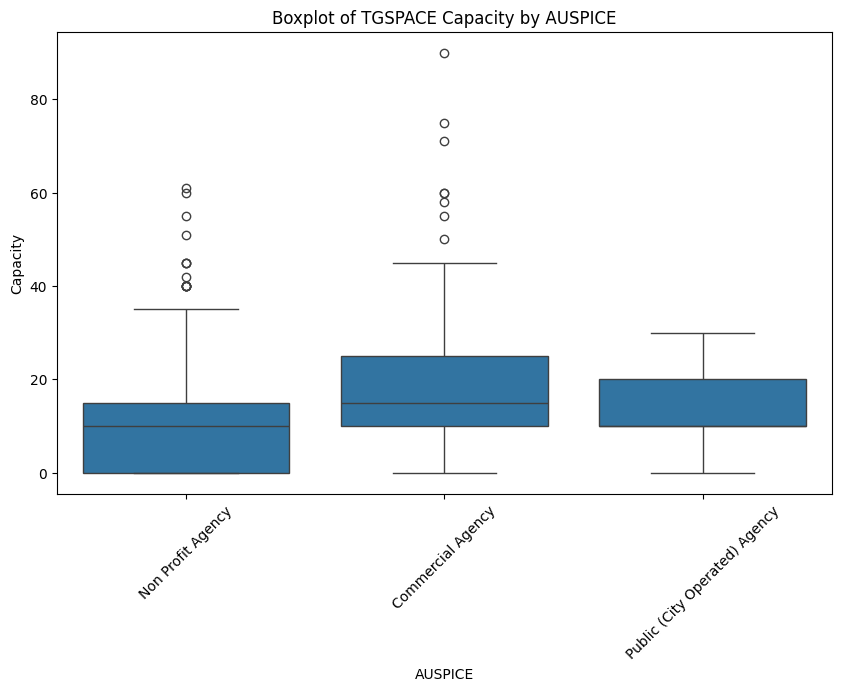

In [ ]:
#EDA Stuff
#boxplot for Capacity vs auspice
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='Capacity', data=df_filtered)
plt.title('Boxplot of TGSPACE Capacity by AUSPICE')
plt.xticks(rotation=45)
plt.show()



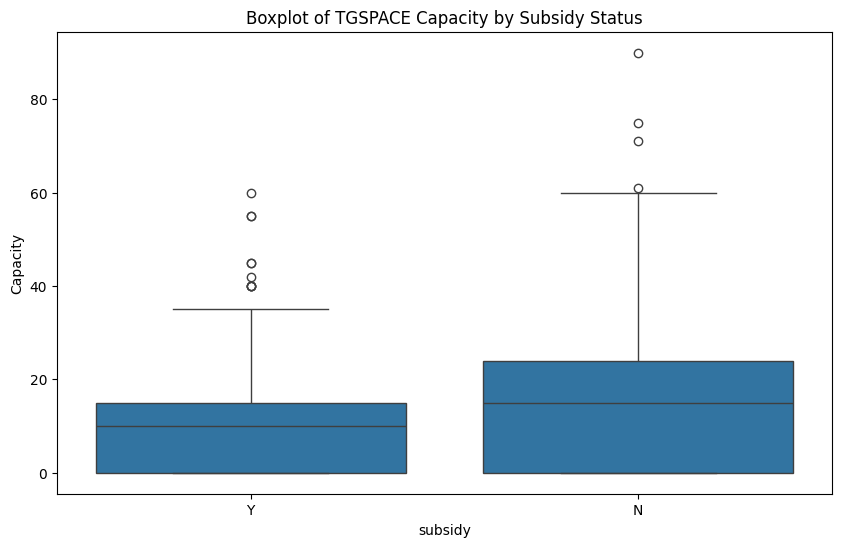

In [ ]:
#EDA 2
#Boxplot for Capacity vs subsidy
plt.figure(figsize=(10, 6))
sns.boxplot(x='subsidy', y='Capacity', data=df_filtered)
plt.title('Boxplot of TGSPACE Capacity by Subsidy Status')
plt.show()


<ipython-input-7-4d4c5dd7eda9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AUSPICE'] = df_filtered['AUSPICE'].astype('category')
<ipython-input-7-4d4c5dd7eda9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['subsidy'] = df_filtered['subsidy'].astype('category')


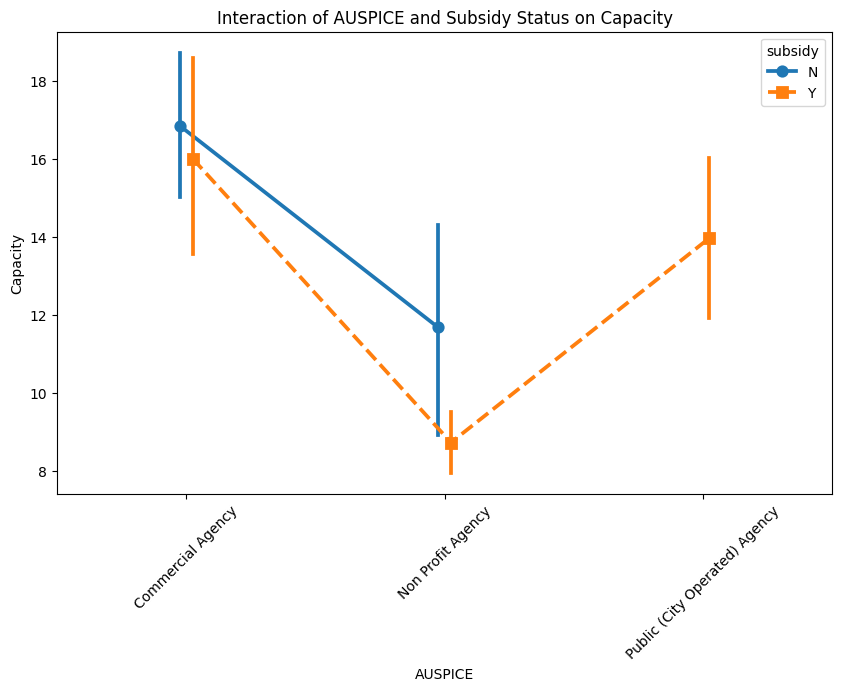

In [ ]:
#EDA
#interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

#assign categorical type to auspice and subsidy
df_filtered['AUSPICE'] = df_filtered['AUSPICE'].astype('category')
df_filtered['subsidy'] = df_filtered['subsidy'].astype('category')
df_filtered = df_filtered.dropna(subset=['AUSPICE', 'subsidy', 'Capacity'])

#plot graph
plt.figure(figsize=(10, 6))
sns.pointplot(x='AUSPICE', y='Capacity', hue='subsidy', data=df_filtered, dodge=True, markers=['o', 's'], linestyles=["-", "--"])
plt.title('Interaction of AUSPICE and Subsidy Status on Capacity')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#ONE WAY ANOVA - Auspiace and TGSPACE

#OLS model for ANOVA
model_one_way = ols('Capacity ~ C(AUSPICE)', data=df_filtered).fit()
one_way_anova_results = sm.stats.anova_lm(model_one_way, typ=2)
print(one_way_anova_results)

                   sum_sq      df          F        PR(>F)
C(AUSPICE)   12587.669972     2.0  46.785974  3.376175e-20
Residual    142595.409991  1060.0        NaN           NaN


In [ ]:
#post-hoc test for ONE WAY anova
#tukey's HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_filtered['Capacity'],     #data
                          groups=df_filtered['AUSPICE'],   #groups
                          alpha=0.05)                       #sig level

#results printed in dataframe
tukey_summary = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

print(tukey_summary)

              group1                         group2  meandiff   p-adj   lower  \
0  Commercial Agency              Non Profit Agency   -7.4889  0.0000 -9.3226   
1  Commercial Agency  Public (City Operated) Agency   -2.6767  0.3619 -7.2929   
2  Non Profit Agency  Public (City Operated) Agency    4.8122  0.0317  0.3340   

    upper  reject  
0 -5.6552    True  
1  1.9394   False  
2  9.2904    True  


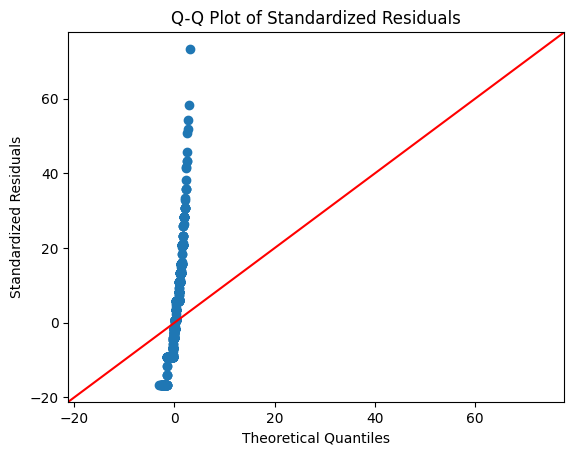

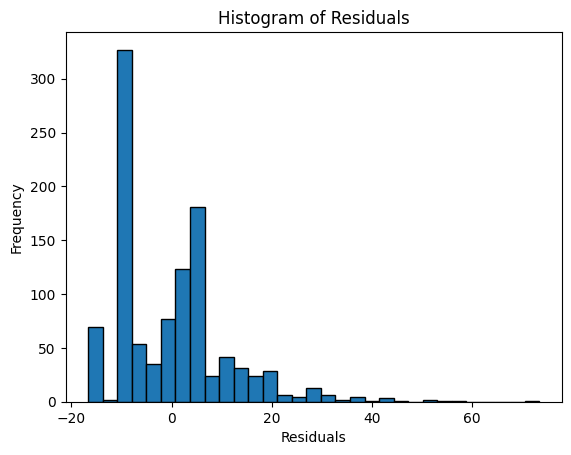

In [ ]:
#one way checks for model diagnostics

#Q-Q plot
sm.qqplot(model_one_way.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

#histogram
plt.hist(model_one_way.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_one_way.resid)
print(f"Shapiro-Wilk test for normality of residuals: W={w}, p-value={pvalue}")

Shapiro-Wilk test for normality of residuals: W=0.8860043287277222, p-value=2.908532083479815e-27


In [ ]:
#assmption 2: variances are homogenous: Levene's test when the sample is not normally distributed
levene_stat, levene_pvalue = stats.levene(*[group['Capacity'].values for name, group in df_filtered.groupby('AUSPICE')])
print(f"Levene's test for homogeneity of variances: Statistic={levene_stat}, p-value={levene_pvalue}")

Levene's test for homogeneity of variances: Statistic=7.515801206593485, p-value=0.0005739261507670632


In [ ]:
#TWO WAY ANOVA - AUSPICE and SUBSUDY and TGSPACE
model_two_way = ols('Capacity ~ C(AUSPICE) * C(subsidy)', data=df_filtered).fit()
two_way_anova_results = sm.stats.anova_lm(model_two_way, typ=2)
print(two_way_anova_results)

                              sum_sq      df          F        PR(>F)
C(AUSPICE)               6100.351067     2.0  22.759087  2.101687e-10
C(subsidy)                858.516307     1.0   6.405876  1.151831e-02
C(AUSPICE):C(subsidy)     192.767266     2.0   0.719173  4.873930e-01
Residual               141793.285497  1058.0        NaN           NaN


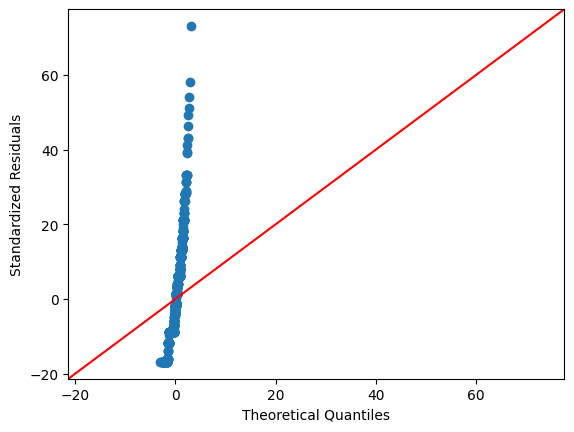

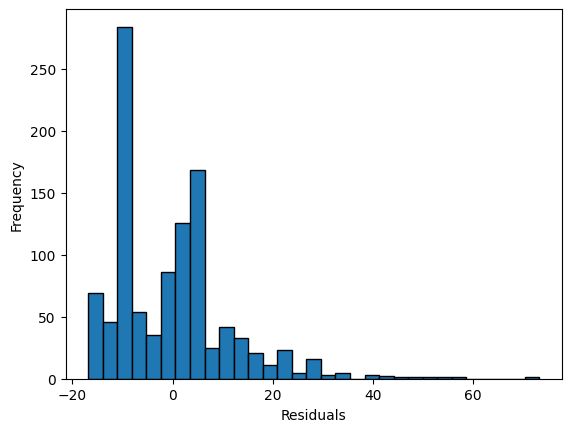

In [ ]:
#check two-way diagnostics
#Q-Q plot
sm.qqplot(model_two_way.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#histogram
plt.hist(model_two_way.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed - Shapiro Wilk test
w, pvalue = stats.shapiro(model_two_way.resid)
print(f"Shapiro-Wilk test for normality of residuals: W={w}, p-value={pvalue}")

Shapiro-Wilk test for normality of residuals: W=0.8996585011482239, p-value=8.582114546619793e-26


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributedd
levene_stat, levene_pvalue = stats.levene(*[group['Capacity'].values for name, group in df_melt.groupby(['AUSPICE', 'subsidy'])])
print(f"Levene's test for homogeneity of variances: Statistic={levene_stat}, p-value={levene_pvalue}")


Levene's test for homogeneity of variances: Statistic=25.285676872920128, p-value=8.22815498353257e-21
